In [1]:
import sys
from pathlib import Path
path = Path("./").absolute().parent
sys.path.insert(1, str(path))

In [2]:
from demo_func import DemoData
import numpy as np
import scipy.cluster.hierarchy as sch

signals_to_generate = 100
network_cluster_count = 12
x_plot_labels = np.linspace(1, 1000, 1000)

demo = DemoData(no_signals=signals_to_generate, seed=833142, no_network_clusters = network_cluster_count)
signals = demo.generate_raw_data()

impairments = {
            "Suckout" : (20, "green", np.arange(300,370), 0.5 * (np.abs(np.arange(-35, 35)) - 35)),
            "Wave" : (12, "orange", np.arange(580,700), 3*np.sin(np.arange(120)/5)),
        }

tilt_x = np.arange(1000)
tilt_y = np.zeros(1000,)
tilt_y[demo.ideal_signal > 0] = -tilt_x[demo.ideal_signal > 0] * 0.02
impairments["Tilt"] = (19, "red", tilt_x, tilt_y)

graph, impaired_signals, network_clusters = demo.generate_impaired_graph(impairments=impairments)
sparse_matrix = demo.get_sparse_wavelet_matrix(impaired_signals)
dists = demo.get_adjacency_matrix(sparse_matrix)

In [3]:
model = sch.linkage(dists, method='average')
threshold = 70
cluster_assignments = sch.fcluster(model, threshold, criterion='distance')
set(cluster_assignments)

{1, 2, 3, 4, 5, 6, 7}

In [8]:
from dataclasses import dataclass, field
from typing import List
import idendro
import importlib as imp

from idendro.callbacks import cluster_labeller
imp.reload(idendro)

@dataclass
class MyAxisLabel(idendro.AxisLabel):
    labelAngle: float = 90

@dataclass
class MyLink(idendro.ClusterLink):
    strokewidth: float = 1
    strokedash: List = field(default_factory= lambda: [1, 5, 1])
    strokeopacity: float = 0.5

@dataclass
class MyNode(idendro.ClusterNode):
    radius: float = 4
    _default_leaf_radius: float = 2
    labelsize: float = 10
    opacity: float = 0.5
    pass


cdata = idendro.ClusteringData(linkage_matrix=model, cluster_assignments=cluster_assignments, threshold=threshold)

dd = idendro.IDendro(link_factory=lambda x: MyLink(**x), node_factory=lambda x: MyNode(**x), axis_label_factory=lambda x: MyAxisLabel(**x))
dd.set_cluster_info(cdata)
dendrogram = dd.create_dendrogram(
    compute_nodes=True, 
    leaf_label_func= cluster_labeller()
)

dd.create_dendrogram()


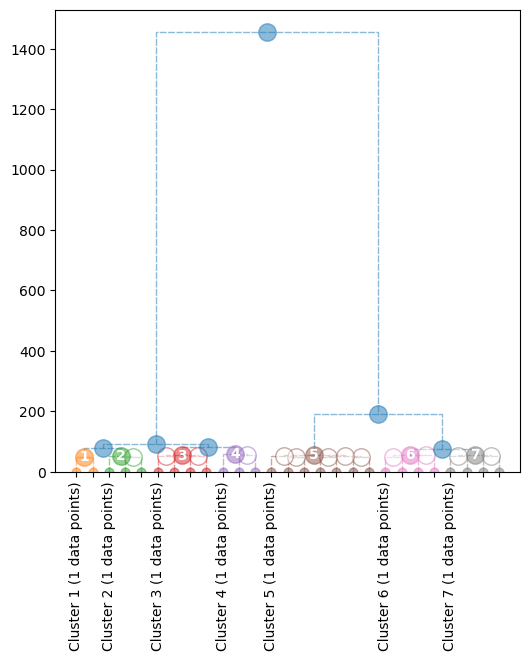

In [9]:

o = dendrogram.to_matplotlib(orientation='top', height=6, width=6, show_nodes=True)
#o.update_yaxes(type='log', range=(-1, 3.3))

In [4]:
dendrogram.to_plotly(orientation='top', height=650, width=900, show_nodes=True)

NameError: name 'dendrogram' is not defined

In [ ]:
_, nd = cdata.get_tree()
L, M = cdata.get_leaders()

L

array([161, 182, 185, 192, 190, 191, 188], dtype=int32)

In [ ]:
import pandas as pd
import altair as alt

dash = [1,0]
alt.Chart(pd.DataFrame([{'x': 0, "y": 0, "dash": dash}, {'x': 1, "y": 1, "dash": dash}])).mark_line().encode(
    alt.X('x'), alt.Y('y'), alt.StrokeDash('dash', scale=None)
)


alt.Chart(...)

In [ ]:
import json
from dataclasses import asdict
dendrogram.nodes[0]

MyNode(x=5.0, y=0, type='leaf', id=66, cluster_id=None, edgecolor='#ff7f0e', label='', hovertext={'# of items': '1', 'linkage_id': 66}, fillcolor='#ff7f0e', radius=2, opacity=0.5, labelsize=10, labelcolor='#fff', _default_leaf_radius=2)

In [ ]:
import pandas as pd
from dataclasses import asdict
a = [asdict(x) for x in dendrogram.links]
pd.DataFrame(a).explode(["x", "y"]).reset_index()

,index,x,y,fillcolor,id,children_id,cluster_id,strokewidth,strokedash,strokeopacity,_order_helper
0,0,5.0,0.0,#ff7f0e,161,"(66, 68)",1.0,1,"[1, 5, 1]",0.5,"[0, 1, 2, 3]"
1,0,5.0,48.917475,#ff7f0e,161,"(66, 68)",1.0,1,"[1, 5, 1]",0.5,"[0, 1, 2, 3]"
2,0,15.0,48.917475,#ff7f0e,161,"(66, 68)",1.0,1,"[1, 5, 1]",0.5,"[0, 1, 2, 3]"
3,0,15.0,0.0,#ff7f0e,161,"(66, 68)",1.0,1,"[1, 5, 1]",0.5,"[0, 1, 2, 3]"
4,1,35.0,0.0,#2ca02c,159,"(71, 124)",NaN,1,"[1, 5, 1]",0.5,"[0, 1, 2, 3]"
...,...,...,...,...,...,...,...,...,...,...,...
99,24,230.0,73.643601,#1f77b4,197,"(188, 193)",NaN,1,"[1, 5, 1]",0.5,"[0, 1, 2, 3]"
100,25,53.75,93.054673,#1f77b4,198,"(196, 197)",NaN,1,"[1, 5, 1]",0.5,"[0, 1, 2, 3]"
101,25,53.75,1456.796403,#1f77b4,198,"(196, 197)",NaN,1,"[1, 5, 1]",0.5,"[0, 1, 2, 3]"
102,25,190.625,1456.796403,#1f77b4,198,"(196, 197)",NaN,1,"[1, 5, 1]",0.5,"[0, 1, 2, 3]"


1

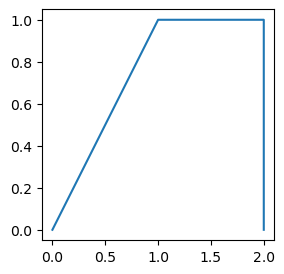

In [ ]:
from matplotlib import pyplot

ax = pyplot.figure(figsize=(3,3)).subplots()

ax.plot([0,1, 2, 2], [0,1, 1, 0])


@dataclass
class Foo:
    x: float = 1
    y: float = 2

f = Foo()
f.__getattribute__('x')